In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# load csv file
Train = pd.read_csv("train.csv")
data=Train
data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [3]:
data['label'].value_counts()

label
0    29720
1     2242
Name: count, dtype: int64

In [5]:
# removing usernames from tweet
data['new_tweet'] = data.tweet.str.replace('@user', '')
data.head()

,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [6]:
# removing punctuation, numbers, and special Characters
# [a-zA-Z] = Any single character in the range a-z or A-Z
# ^ = Start of line 
# $ = End of line 

data['new_tweet'] = data['new_tweet'].str.replace("[^a-zA-Z#]", " ")
data['new_tweet'] = data['new_tweet'].str.replace("#", "")
data.head()


,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i can't use cause the...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in u...
4,5,0,factsguide: society now #motivation,factsguide: society now motivation


In [7]:
# get most common words in training dataset
from collections import Counter 
all_words = []
for line in list(data['new_tweet']):
    words = line.split()
    for word in words:
        all_words.append(word.lower())
    
    
a=Counter(all_words).most_common(10)
a

[('the', 10087),
 ('to', 9780),
 ('a', 6387),
 ('i', 5676),
 ('you', 4980),
 ('and', 4842),
 ('in', 4579),
 ('for', 4438),
 ('of', 4155),
 ('is', 4108)]

In [8]:
#tokenization
data['new_tweet'] = data['new_tweet'].apply(lambda x: x.split())
data.head()

,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,"[when, a, father, is, dysfunctional, and, is, ..."
1,2,0,@user @user thanks for #lyft credit i can't us...,"[thanks, for, lyft, credit, i, can't, use, cau..."
2,3,0,bihday your majesty,"[bihday, your, majesty]"
3,4,0,#model i love u take with u all the time in ...,"[model, i, love, u, take, with, u, all, the, t..."
4,5,0,factsguide: society now #motivation,"[factsguide:, society, now, motivation]"


In [9]:
#stemmer
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

data['new_tweet']= data['new_tweet'].apply(lambda x: [stemmer.stem(i) for i in x])
data.head()

,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,"[when, a, father, is, dysfunct, and, is, so, s..."
1,2,0,@user @user thanks for #lyft credit i can't us...,"[thank, for, lyft, credit, i, can't, use, caus..."
2,3,0,bihday your majesty,"[bihday, your, majesti]"
3,4,0,#model i love u take with u all the time in ...,"[model, i, love, u, take, with, u, all, the, t..."
4,5,0,factsguide: society now #motivation,"[factsguide:, societi, now, motiv]"


In [10]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/te/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize

#stopwords = set(stopwords.words('english'))
stopwords = nltk.corpus.stopwords.words('english')



In [12]:
newStopWords = ['u','go','got','via','or','ur','us','in','i','let','the','to','is','amp','make','one','day','days','get']
stopwords.extend(newStopWords)


In [13]:
import string 

def process(text):
    # Check characters to see if they are in punctuation
    nopunc = set(char for char in list(text) if char not in string.punctuation)
    # Join the characters to form the string.
    nopunc = " ".join(nopunc)
    # remove any stopwords if present
    return [word for word in nopunc.lower().split() if word.lower() not in stopwords]
    

In [14]:
data['new_tweet'] = data['new_tweet'].apply(process) 
data.head()

,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,"[drag, dysfunction., run, kid, father, dysfunc..."
1,2,0,@user @user thanks for #lyft credit i can't us...,"[wheelchair, pdx., use, caus, offer, van, lyft..."
2,3,0,bihday your majesty,"[bihday, majesti]"
3,4,0,#model i love u take with u all the time in ...,"[ðððð, ð¦ð¦ð¦, take, urð±!!..."
4,5,0,factsguide: society now #motivation,"[motiv, factsguide:, societi]"


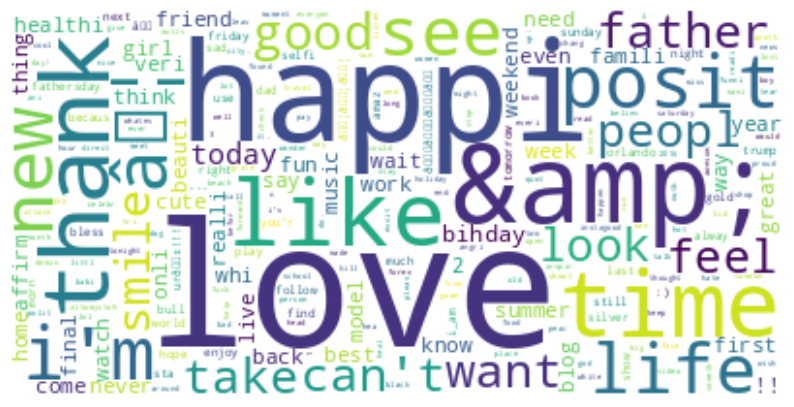

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# split sentences to get individual words
words = []
for line in data['new_tweet']: 
    words.extend(line)
    
# create a word frequency dictionary
wordfreq = Counter(words)
# draw a Word Cloud with word frequencies
wordcloud = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
   ).generate_from_frequencies(wordfreq)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [16]:
def string (text):
    to_return=""
    for i in list(text):
        to_return += str(i) + " "
    to_return = to_return[:-1]
    
    return to_return
    
       
data['new_tweet'] = data['new_tweet'].apply(string)
data.head()  

,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,drag dysfunction. run kid father dysfunct selfish
1,2,0,@user @user thanks for #lyft credit i can't us...,wheelchair pdx. use caus offer van lyft disapo...
2,3,0,bihday your majesty,bihday majesti
3,4,0,#model i love u take with u all the time in ...,ðððð ð¦ð¦ð¦ take urð±!!! lo...
4,5,0,factsguide: society now #motivation,motiv factsguide: societi


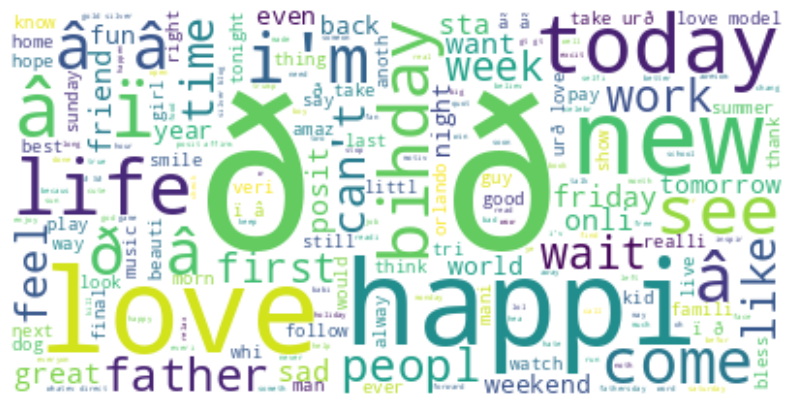

In [17]:
positive = [r for r in data['new_tweet'][data['label']==0]]
pos = ''.join(positive)

# draw a Word Cloud with word frequencies
wordcloud = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
   ).generate(pos)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

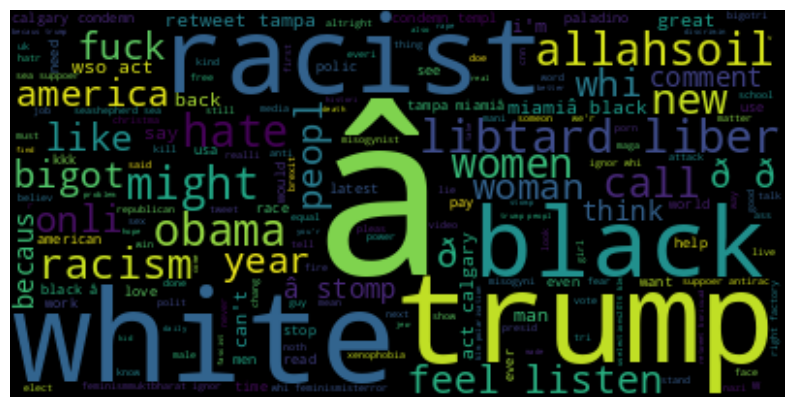

In [18]:
negative = [r for r in data['new_tweet'][data['label']==1]]
neg = ''.join(negative)

# draw a Word Cloud with word frequencies
wordcloud = WordCloud(
    background_color='black',
    max_words=2000,
    stopwords=stopwords
   ).generate(neg)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Bag of words 

In [19]:
data.drop(["id","tweet" ],axis=1,inplace=True)
data.head()

,label,new_tweet
0,0,drag dysfunction. run kid father dysfunct selfish
1,0,wheelchair pdx. use caus offer van lyft disapo...
2,0,bihday majesti
3,0,ðððð ð¦ð¦ð¦ take urð±!!! lo...
4,0,motiv factsguide: societi


In [20]:
#Split data into training and testing sets 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data["new_tweet"], 
                                                    data["label"], test_size = 0.2, random_state = 42)

print("training set :",x_train.shape,y_train.shape)
print("testing set :",x_test.shape,y_test.shape)

training set : (25569,) (25569,)
testing set : (6393,) (6393,)


In [21]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
count_vect = CountVectorizer(stop_words='english')
transformer = TfidfTransformer(norm='l2',sublinear_tf=True)


In [22]:
x_train_counts = count_vect.fit_transform(x_train)
x_train_tfidf = transformer.fit_transform(x_train_counts)

print(x_train_counts.shape)
print(x_train_tfidf.shape)

(25569, 33330)
(25569, 33330)


In [23]:
x_test_counts = count_vect.transform(x_test)
x_test_tfidf = transformer.transform(x_test_counts)

print(x_test_counts.shape)
print(x_test_tfidf.shape)

(6393, 33330)
(6393, 33330)


### Model building

#### Random Forest Classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200)
model.fit(x_train_tfidf,y_train)

RandomForestClassifier(n_estimators=200)

In [25]:
predictions = model.predict(x_test_tfidf)

In [26]:
#Accuracy_score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)*100

96.12075707805413

In [27]:
from sklearn.metrics import confusion_matrix,f1_score
confusion_matrix(y_test,predictions)

array([[5903,   34],
       [ 214,  242]])

In [28]:
#f1-score
f1_score(y_test,predictions)

0.6612021857923498

In [29]:
predictions

array([0, 0, 0, ..., 0, 0, 1])

### Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(random_state=400 )
logmodel.fit(x_train_tfidf,y_train)

LogisticRegression(random_state=400)

In [31]:
log_predictions = logmodel.predict(x_test_tfidf)

In [32]:
from sklearn.metrics import confusion_matrix,f1_score
confusion_matrix(y_test,log_predictions)

array([[5923,   14],
       [ 314,  142]])

In [33]:
f1_score(y_test,log_predictions)

0.46405228758169936

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,log_predictions)*100

94.86938839355545